# Data Pre-Processing
1. Data Cleaning
2. Feature Engineering
3. Feature Encoding
4. Log Transformation
5. Normalization

In [83]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
from IPython.display import Image
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler, StandardScaler

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.2
pandas version :  1.2.1
seaborn version :  0.11.1


# Load and Describe Data

In thi project, we create our dataset into 3 different datasets:
1. `data` as the original data, used for exploratory data analysis
2. `data_clean` as the cleaned data form missing value and duplicated, used for data cleaning until feature engineering & encoding
3. `df_pre` as the final dataset used for modeling. This dataset already processed with log/norm


## Load Data

In [2]:
data = pd.read_csv('train_LZdllcl.csv')
print("Total Row", data.shape[0])
print("Total Feature", data.shape[1])
data.head()

Total Row 54808
Total Feature 14


employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [3]:
data['promoted'] = np.where(data['is_promoted'] == 1, 'Yes', 'No')
data

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8              1            0                  49   
1                      4              0            0                  60   
2                      7              0            0                  50   
3                     10              0            0                  50   
4                      2              0            0                  73   
...                  ...            ...          ...                 ...   
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted promoted  
0                0       No  
1                0       No  
2                0       No  
3                0       No  
4                0       No  
...            ...      ...  
54803            0       No  
54804            0       No  
54805            0       No  
54806            0       No  
54807            0       No  

[54808 rows x 15 columns]

## Describe Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
 14  promoted              54808 non-null  object 
dtypes: float64(1), int6

__*Distribution of Promoted/Not Promoted Employees*__
<a id = "promoted/not_promoted" ></a>

In [5]:
fig, ax = plt.subplots(figsize = (15,7))

g = sns.countplot(data=data,
             x='promoted',
             palette = sns.color_palette('Blues_d', n_colors = 13, desat = 1))

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 300,
           s = '{:.0f}'.format(height),
           ha = 'center'
          )

title = """
Distribution of Promoted Employees
"""

text = """
The number of promoted/not prmoted employees is not balanced extremely.
Promoted employees are lower than not promoted employees.
Hypothetically, this imbalanced data can be poor for our modeling.
"""

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Is employee eligible for promotion?', fontsize = 15) # Add the x-label
plt.ylabel('Number of Employees', fontsize = 15) # Add the y-label

plt.text(x = 0.45, y = 40000, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 0.45, y = 32000, s=text,
        fontsize = 14, alpha = .85);

plt.savefig('fig/Distributin of Promoted and Not Promoted Employees.png')

# Data Understanding: Exploratory Data Analysis (EDA)

## Statistical Summary

### Separation of Categorical & Numerical Data

In [6]:
# assign the categorical data into cats object
cats = ['department','region','education','gender','recruitment_channel']

# assign the numerical data into nums object
nums = ['employee_id','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?',
        'avg_training_score','is_promoted']

### Statistical Numerical Data

In [7]:
data[nums].describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

**Conclusion from Statistical Numerical Data**<br>

* The distribution of data for feature `no_of_trainings`, `age`, `length_of_service`, `avg_training_score` looks normal *(mean & median are close enough)*

### Statistical Categorical Data

In [8]:
data[cats].describe()

department    region   education gender recruitment_channel
count               54808     54808       52399  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       36669  38496               30446

**Conclusion from Statistical Categorical Data**
* Data majority is `m` (Male) with frequency 38496 
* Mostly work in `Sales & Marketing departments` 
* Mostly education degree is `Bachelor's`

#### Check Missing Value
<a id = 'distribution_of_missing_value'></a>

`education`
`previous_year_rating`
`employee_id`

In [9]:
# assign features with missing value into data_missing object
data_missing = data.isnull().sum().reset_index()
data_missing.columns = ['feature','missing_value']
data_missing = data_missing[data_missing['missing_value'] > 0].reset_index(drop=True)
data_missing['percentage'] = (data_missing['missing_value']/len(data))*100
data_missing

feature  missing_value  percentage
0             education           2409    4.395344
1  previous_year_rating           4124    7.524449

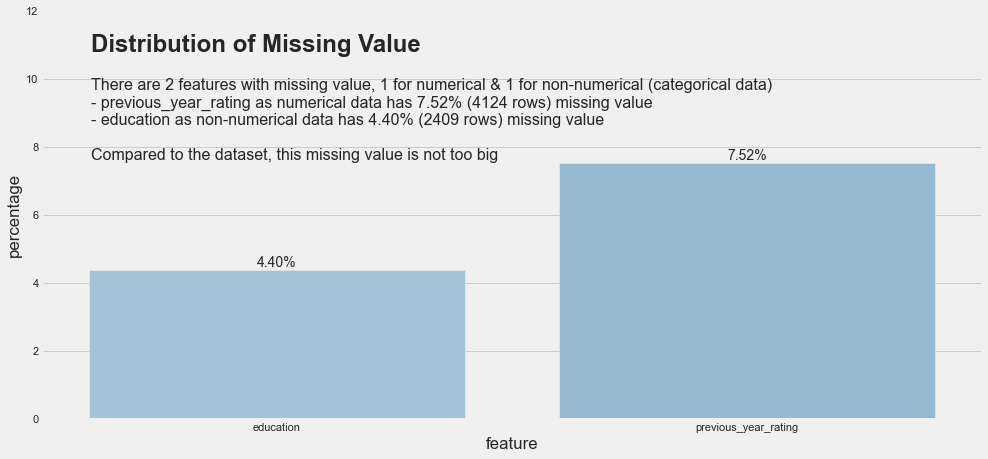

In [10]:
fig, ax = plt.subplots(figsize = (15,7))

mvalue_plot = sns.barplot(x='feature', y='percentage', data=data_missing,
           palette = sns.color_palette('Blues_d', n_colors = 13, desat = 1))

ax.set_ylim(0,12)

for p in mvalue_plot.patches:
    height = p.get_height()
    mvalue_plot.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.1,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center')

title = '''Distribution of Missing Value'''
fig.text(x=0.125, y=0.8, s = title, fontsize = 24, weight = 'bold')

text = '''
There are 2 features with missing value, 1 for numerical & 1 for non-numerical (categorical data)
- previous_year_rating as numerical data has 7.52% (4124 rows) missing value
- education as non-numerical data has 4.40% (2409 rows) missing value

Compared to the dataset, this missing value is not too big
'''
fig.text(x=0.125, y=0.55, s = text, fontsize=16)

plt.savefig('fig/Distribution of Missing Value.png')


#### Check Cardinality or Unique Value from Categocial Data
<a id = 'unique_value' ></a>

In [11]:
# check the cardinality or unique value from categorical data 
# and assign thgem into data_cat_unique object
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'promoted'],
      dtype='object')

(54808, 6)


department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   

  promoted  
0       No  
1       No  
2       No

In [12]:
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['feature', 'unique value']
data_cat_unique = data_cat_unique.sort_values('unique value', ascending=False).reset_index(drop=True)
data_cat_unique

feature  unique value
0               region            34
1           department             9
2            education             3
3  recruitment_channel             3
4               gender             2
5             promoted             2

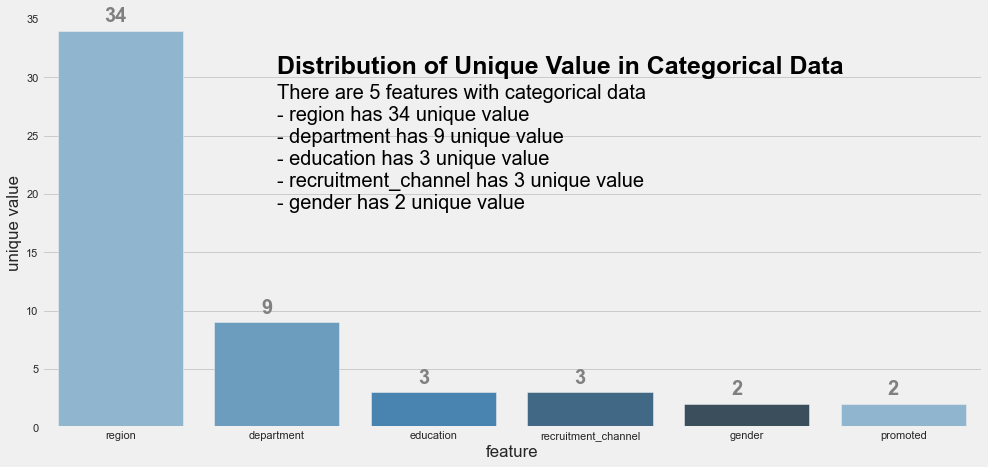

In [13]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='unique value',data=data_cat_unique,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=5, desat=1))

x = np.arange(len(data_cat_unique['feature']))
y = data_cat_unique['unique value']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+0.75, str(v), fontsize = 20, color='gray', fontweight='bold')
    
title = '''
Distribution of Unique Value in Categorical Data
'''
ax.text(1,28,title,horizontalalignment='left',color='black',fontsize=25,fontweight='bold')
    

text = '''
There are 5 features with categorical data
- region has 34 unique value
- department has 9 unique value
- education has 3 unique value
- recruitment_channel has 3 unique value
- gender has 2 unique value

'''
plt.text(1,23,text,horizontalalignment='left',color='black',fontsize=20,fontweight='normal',va='center')
    
ax.set_ylim(0,35)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

plt.savefig('fig/Distribution of Unique Value.png')

#### Check Dulicated Data

In [14]:
data.duplicated().sum()

0

**Early Brief**<br>
* Dataset has 14 features and 54808 rows
* 5 features are in categorical data **(inlude 1 feature as target, `is_promoted`)**
* 9 features are in numerical data
* There are 2 features with missing value: 
    - 2409 rows in `education`
    - 4124 rows in `previous_year_rating`
* There are no duplicated data, at least before data preparation 

## Graphical Approach

### Univariate Analysis
*Do data analysis for each feature separately, look the distrbution of data in details*

#### Numerical Data

In [15]:
#assign numerical data into dat_num object
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

(54808, 9)


employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0        65438                1   35                   5.0                  8   
1        65141                1   30                   5.0                  4   
2         7513                1   34                   3.0                  7   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0

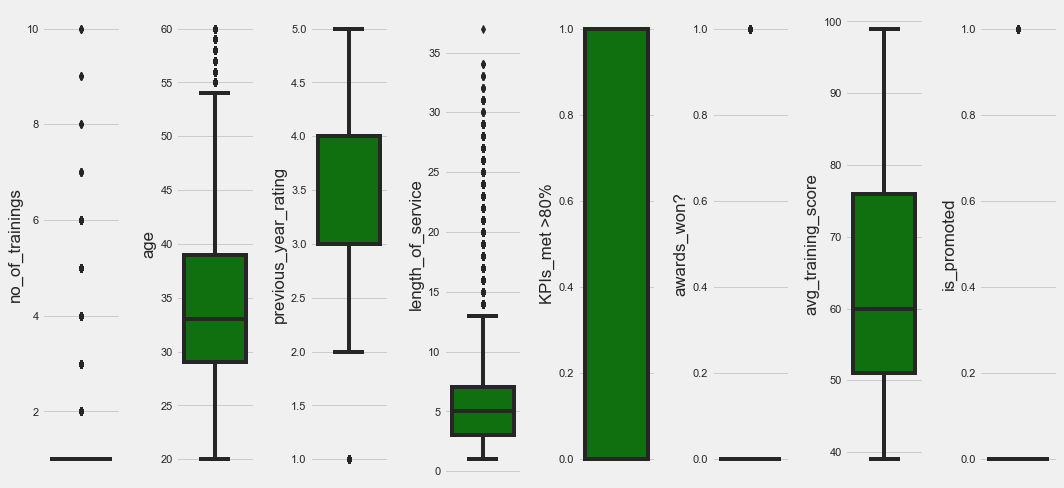

In [16]:
# look at the distribution of data with boxplot
features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout()

##### Distribution of Promoted Employees based on `age`
<a id = 'promoted_by_age' ></a>

In [17]:
title = '''
Distribution of Promoted Employees based on age
'''
fig = px.histogram(data, x="age", title = title,
                   color = "is_promoted", 
                   labels= {"age":"Age","is_promoted": "Promoted"},
                   nbins=35,
                   color_discrete_sequence=px.colors.qualitative.Pastel1
                  )

fig.update_layout(yaxis_title=" ")
fig.update_layout(
    autosize=False,
    width=900,
    height=650)
fig.show()
print("The average age of the employees is " + str(round(np.mean(data.age),0)))
print("The median age of the employees is " + str(np.median(data.age)))

The average age of the employees is 35.0
The median age of the employees is 33.0


##### Probability to Get Promotion based on `KPIs_met >80%`
<a id = 'promoted_by_kpi'></a>

In [18]:
kpi_probs= data.groupby(['KPIs_met >80%', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

kpi_probs.columns = ['KPIs_met >80%', 'is_promoted', 'employees']

kpi_probs = pd.pivot_table(kpi_probs, 
               index = 'KPIs_met >80%',
               columns = 'is_promoted',
               values = 'employees'
              ).reset_index()
kpi_probs.columns = ['KPIs_met >80%','not_promoted','promoted']

kpi_probs['total_employees'] = kpi_probs['not_promoted']+kpi_probs['promoted']

kpi_probs['promotion_probs'] = (kpi_probs['promoted']/(kpi_probs['not_promoted']+kpi_probs['promoted']))*100

kpi_probs = kpi_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)

kpi_probs['KPIs_met >80%'] = np.where(kpi_probs['KPIs_met >80%'] == 1, 'YES', "NO")

kpi_probs

KPIs_met >80%  not_promoted  promoted  total_employees  promotion_probs
0           YES         16029      3262            19291        16.909440
1            NO         34111      1406            35517         3.958668

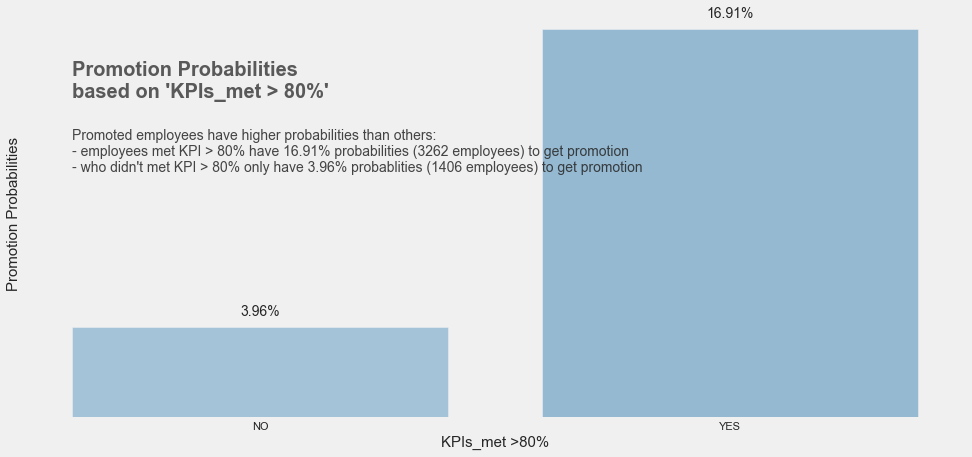

In [19]:
#melihat peluang yang dipromosikan berdasarkan ketercapaian KPI > 80%
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x='KPIs_met >80%', y='promotion_probs', data=kpi_probs,
                order=kpi_probs.sort_values('promotion_probs')['KPIs_met >80%'],
                palette=sns.color_palette("Blues_d", n_colors=13, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center'
          )

title = '''
Promotion Probabilities
based on 'KPIs_met > 80%'
'''

text = '''
Promoted employees have higher probabilities than others:
- employees met KPI > 80% have 16.91% probabilities (3262 employees) to get promotion
- who didn't met KPI > 80% only have 3.96% probablities (1406 employees) to get promotion
'''

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('KPIs_met >80%', fontsize = 15) # Add the x-label
plt.ylabel('Promotion Probabilities', fontsize = 15) # Add the y-label

plt.text(x = -0.4, y = 13, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -0.4, y = 10, s=text,
        fontsize = 14, alpha = .85);

plt.savefig('fig/Probability based on KPI.png')

##### Probability to Get Promotion based on `previous_year_rating`
<a id = 'previous_year_rating' ></a>

In [20]:
rating_probs = data.groupby(['previous_year_rating','is_promoted']).agg({
    'department': ['count']
}).reset_index()

rating_probs.columns = ['previous_year_rating', 'is_promoted', "employees"]

rating_probs = pd.pivot_table(rating_probs,
                              index = 'previous_year_rating',
                              columns = 'is_promoted',
                              values = "employees"
                             ).reset_index()

rating_probs.columns = ['previous_year_rating', 'not_promoted', 'promoted']
rating_probs['total_employees'] = rating_probs['not_promoted'] + rating_probs['promoted']
rating_probs['promotion_probs'] = (rating_probs['promoted']/(rating_probs['not_promoted']+rating_probs['promoted']))*100
rating_probs = rating_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
rating_probs

previous_year_rating  not_promoted  promoted  total_employees  \
0                   5.0          9820      1921            11741   
1                   4.0          9093       784             9877   
2                   3.0         17263      1355            18618   
3                   2.0          4044       181             4225   
4                   1.0          6135        88             6223   

   promotion_probs  
0        16.361468  
1         7.937633  
2         7.277903  
3         4.284024  
4         1.414109

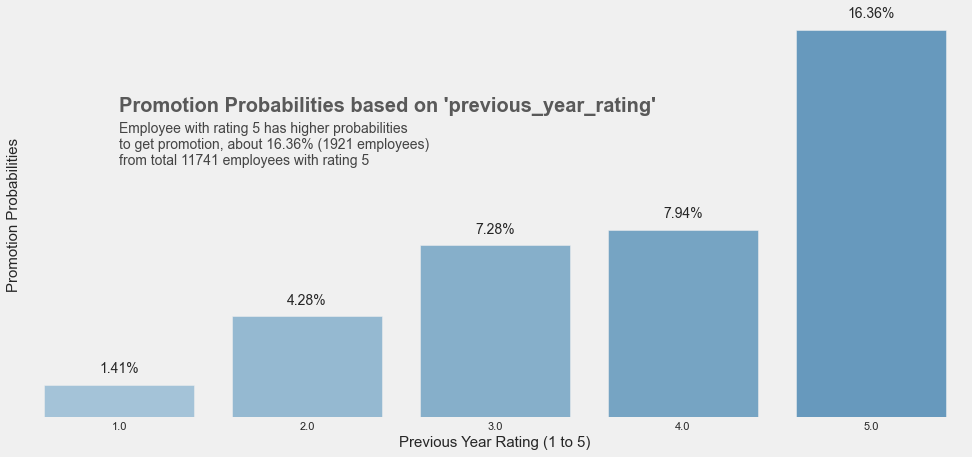

In [21]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x='previous_year_rating', y='promotion_probs', data=rating_probs,
                order=rating_probs.sort_values('promotion_probs')['previous_year_rating'],
                palette=sns.color_palette("Blues_d", n_colors=13, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center'
          )

title = '''
Promotion Probabilities based on 'previous_year_rating'
'''

text = '''
Employee with rating 5 has higher probabilities
to get promotion, about 16.36% (1921 employees) 
from total 11741 employees with rating 5
'''

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Previous Year Rating (1 to 5)', fontsize = 15) # Add the x-label
plt.ylabel('Promotion Probabilities', fontsize = 15) # Add the y-label

plt.text(x = 0, y = 12, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 0, y = 10, s=text,
        fontsize = 14, alpha = .85);

plt.savefig('fig/Probability based on previous_year_rating.png')

##### Probability to Get Promotion based on `awards_won?`
<a id = 'awards_won?' ></a>

In [22]:
awards_probs = data.groupby(['awards_won?', "is_promoted"]).agg({
    'department': ['count']
}).reset_index()

awards_probs.columns = ["awards_won?", "is_promoted", "employees"]

awards_probs = pd.pivot_table(awards_probs,
                              index = "awards_won?",
                              columns = "is_promoted",
                              values = "employees"
                             ).reset_index()

awards_probs.columns = ["awards_won?", "not_promoted", "promoted"]
awards_probs['total_employees'] = awards_probs['not_promoted'] + awards_probs['promoted']
awards_probs["promotion_probs"] = (awards_probs['promoted']/(awards_probs["not_promoted"]+awards_probs["promoted"]))*100
awards_probs = awards_probs.sort_values("promotion_probs", ascending=False).reset_index(drop=True)
awards_probs['awards_won?'] = np.where(awards_probs['awards_won?'] == 1,
                                      'YES', 'NO')
awards_probs

awards_won?  not_promoted  promoted  total_employees  promotion_probs
0         YES           711       559             1270        44.015748
1          NO         49429      4109            53538         7.674922

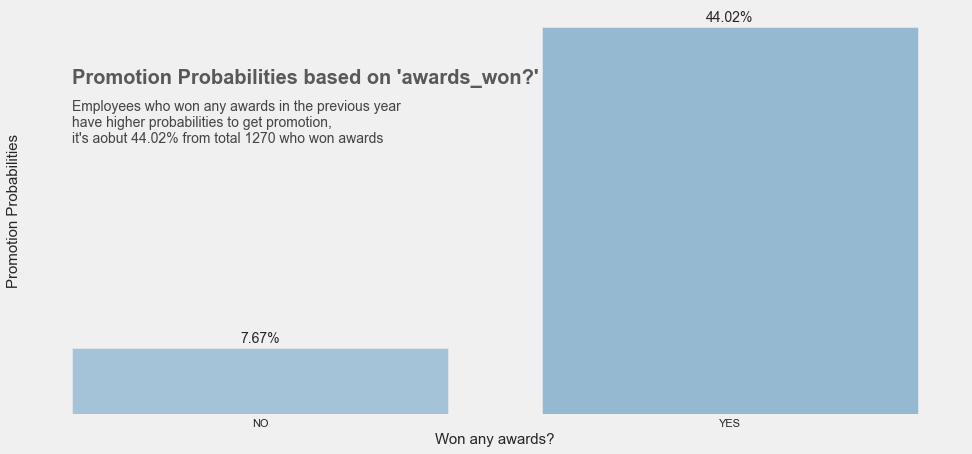

In [23]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x='awards_won?', y='promotion_probs', data=awards_probs,
                order=awards_probs.sort_values('promotion_probs')['awards_won?'],
                palette=sns.color_palette("Blues_d", n_colors=13, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center'
          )

title = '''
Promotion Probabilities based on 'awards_won?'
'''

text = '''
Employees who won any awards in the previous year
have higher probabilities to get promotion, 
it's aobut 44.02% from total 1270 who won awards
'''

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Won any awards?', fontsize = 15) # Add the x-label
plt.ylabel('Promotion Probabilities', fontsize = 15) # Add the y-label

plt.text(x = -0.4, y = 35, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -0.4, y = 29, s=text,
        fontsize = 14, alpha = .85);

plt.savefig('fig/Probability based on awards_won.png')

##### Distribution & Probability of Promoted Employees based on `length_of_service`
<a id = 'length_of_service' ></a>

**Distribution**

In [24]:
title = '''
Distribution of Promoted Employees based on length_of_service
'''
fig = px.histogram(data, x="length_of_service", title = title,
                   color = "is_promoted", 
                   labels= {"length_of_service":"Length of Service (Year)",
                            "is_promoted": "Promoted"},
                   nbins=35,
                   color_discrete_sequence=px.colors.qualitative.Pastel1
                  )

fig.update_layout(yaxis_title=" ")
fig.update_layout(
    autosize=False,
    width=900,
    height=650)
fig.show()
print("The average length of service (year) of the employees is " + str(round(np.mean(data.length_of_service),0)))
print("The median length of service (year) of the employees is " + str(np.median(data.length_of_service)))

The average length of service (year) of the employees is 6.0
The median length of service (year) of the employees is 5.0


**Probability**

In [25]:
los_probs2 = data.groupby(['length_of_service', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

los_probs2.columns = ['length_of_service', 'is_promoted','employees']

los_probs2 = pd.pivot_table(los_probs2,
                             index = 'length_of_service',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

los_probs2.columns = ['length_of_service','not_promoted','promoted']
los_probs2['promotion_probs'] = (los_probs2['promoted']/(los_probs2['not_promoted']+los_probs2['promoted']))*100
los_probs2 = los_probs2.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
los_probs2

length_of_service  not_promoted  promoted  promotion_probs
0                  34           3.0       1.0        25.000000
1                  32           8.0       2.0        20.000000
2                  23          58.0       7.0        10.769231
3                  11         820.0      96.0        10.480349
4                  29          27.0       3.0        10.000000
5                  22          55.0       6.0         9.836066
6                  19         297.0      32.0         9.726444
7                   8        2614.0     269.0         9.330558
8                  10        1989.0     204.0         9.302326
9                   2        6089.0     595.0         8.901855
10                  4        6238.0     598.0         8.747806
11                  9        2400.0     229.0         8.710536
12                  3        6424.0     609.0         8.659178
13                  6        4333.0     401.0         8.470638
14                  7        5087.0     464.0         8.358854
15                  1        4170.0     377.0         8.291181
16                  5        5357.0     475.0         8.144719
17                 12         731.0      63.0         7.934509
18                 13         633.0      54.0         7.860262
19                 20         118.0      10.0         7.812500
20                 16         507.0      41.0         7.481752
21                 15         550.0      43.0         7.251265
22                 28          28.0       2.0         6.666667
23                 18         367.0      25.0         6.377551
24                 17         406.0      26.0         6.018519
25                 14         520.0      29.0         5.282332
26                 21          74.0       4.0         5.128205
27                 25          49.0       2.0         3.921569
28                 27          35.0       1.0         2.777778
29                 24          70.0       NaN              NaN
30                 26          41.0       NaN              NaN
31                 30          12.0       NaN              NaN
32                 31          20.0       NaN              NaN
33                 33           9.0       NaN              NaN
34                 37           1.0       NaN              NaN

##### Probability to Get Promotion based on `no_of_trainings`
<a id = 'no_of_trainings' ></a>

In [26]:
nof_probs = data.groupby(['no_of_trainings', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

nof_probs.columns = ['no_of_trainings', 'is_promoted','employees']

nof_probs = pd.pivot_table(nof_probs,
                             index = 'no_of_trainings',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

nof_probs.columns = ['no_of_trainings','not_promoted','promoted']
nof_probs['total_employees'] = nof_probs['not_promoted'] + nof_probs['promoted']
nof_probs['promotion_probs'] = (nof_probs['promoted']/(nof_probs['not_promoted']+nof_probs['promoted']))*100
nof_probs = nof_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
nof_probs

no_of_trainings  not_promoted  promoted  total_employees  promotion_probs
0                1       40468.0    3910.0          44378.0         8.810672
1                2        7382.0     605.0           7987.0         7.574809
2                3        1654.0     122.0           1776.0         6.869369
3                4         442.0      26.0            468.0         5.555556
4                6          42.0       2.0             44.0         4.545455
5                5         125.0       3.0            128.0         2.343750
6                7          12.0       NaN              NaN              NaN
7                8           5.0       NaN              NaN              NaN
8                9           5.0       NaN              NaN              NaN
9               10           5.0       NaN              NaN              NaN

In [27]:
# due to there are no value in some rows in promoted column, just drop it
nof_probs = nof_probs.drop(nof_probs[nof_probs['no_of_trainings']>= 7].index)
nof_probs

no_of_trainings  not_promoted  promoted  total_employees  promotion_probs
0                1       40468.0    3910.0          44378.0         8.810672
1                2        7382.0     605.0           7987.0         7.574809
2                3        1654.0     122.0           1776.0         6.869369
3                4         442.0      26.0            468.0         5.555556
4                6          42.0       2.0             44.0         4.545455
5                5         125.0       3.0            128.0         2.343750

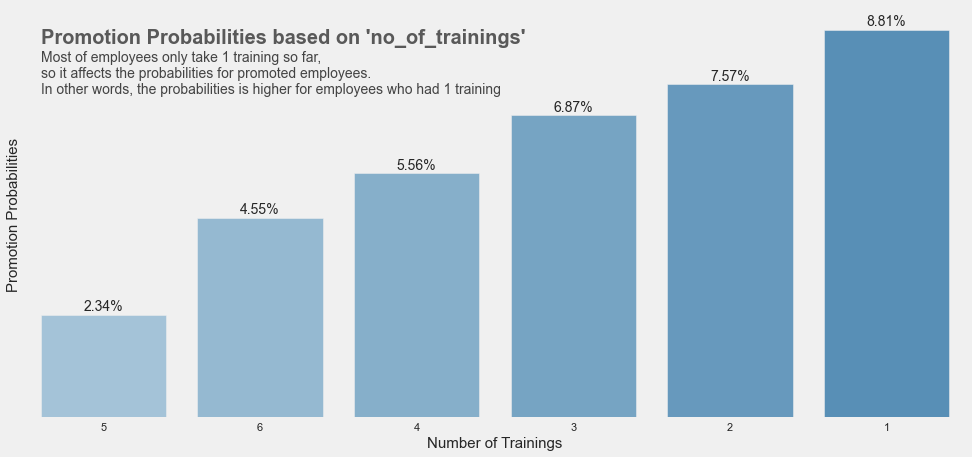

In [28]:
#melihat peluang yang dipromosikan berdasarkan no_of_trainings
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x='no_of_trainings', y='promotion_probs', data=nof_probs,
                order=nof_probs.sort_values('promotion_probs')['no_of_trainings'],
                palette=sns.color_palette("Blues_d", n_colors=13, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.1,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center'
          )

title = '''
Promotion Probabilities based on 'no_of_trainings'
'''

text = '''
Most of employees only take 1 training so far,
so it affects the probabilities for promoted employees.
In other words, the probabilities is higher for employees who had 1 training
'''

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Number of Trainings', fontsize = 15) # Add the x-label
plt.ylabel('Promotion Probabilities', fontsize = 15) # Add the y-label

plt.text(x = -0.4, y = 8, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -0.4, y = 7, s=text,
        fontsize = 14, alpha = .85);

plt.savefig('fig/Probability based on no_of_trainings.png')

##### Distribution & Probability of Promoted Employees based on `avg_training_score`
<a id = 'avg_training_score' ></a>

**Distribution**

In [29]:
title = '''
Distribution of Promoted Employees based on avg_training_score
'''
fig = px.histogram(data, x="avg_training_score", title = title,
                   color = "is_promoted", 
                   labels= {"avg_training_score":"Average Training Score",
                            "is_promoted": "Promoted"},
                   nbins=35,
                   color_discrete_sequence=px.colors.qualitative.Pastel1
                  )

fig.update_layout(yaxis_title=" ")
fig.update_layout(
    autosize=False,
    width=900,
    height=650)
fig.show()
print("The average length of service (year) of the employees is " + str(round(np.mean(data.avg_training_score),0)))
print("The median length of service (year) of the employees is " + str(np.median(data.avg_training_score)))

The average length of service (year) of the employees is 63.0
The median length of service (year) of the employees is 60.0


In [30]:
score_probs = data.groupby(['avg_training_score', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

score_probs.columns = ['avg_training_score', 'is_promoted','employees']

score_probs2 = pd.pivot_table(score_probs,
                             index = 'avg_training_score',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

score_probs.columns = ['avg_training_score','not_promoted','promoted']
score_probs['promotion_probs'] = (score_probs['promoted']/(score_probs['not_promoted']+score_probs['promoted']))*100
score_probs = score_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
score_probs

avg_training_score  not_promoted  promoted  promotion_probs
0                    39             0         2       100.000000
1                    40             0         5       100.000000
2                    76             0       469       100.000000
3                    75             0       354       100.000000
4                    74             0       359       100.000000
..                  ...           ...       ...              ...
111                  45             1        31        96.875000
112                  44             1        10        90.909091
113                  43             1         7        87.500000
114                  42             1         2        66.666667
115                  41             1         1        50.000000

[116 rows x 4 columns]

#### Non - Numerik\cal (Categorical)

In [31]:
# assign categorical data into data_cat object
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'promoted'],
      dtype='object')

(54808, 6)


department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   

  promoted  
0       No  
1       No  
2       No

In [32]:
##memasukkan data categorical ke dalam object data_cat
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'promoted'],
      dtype='object')

(54808, 6)


department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   

  promoted  
0       No  
1       No  
2       No

### Multivariate Analysis

#### Numerical Data
* See the correlation between features using correlation matrix

In [33]:
#membuat matriks korelasi dari setiap data numerik
features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']
corr_= data[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

#### Non Numerical Data (Categorical)

##### Probability to Get Promotion based on `region`
<a id = 'promoted_by_region' ></a>

In [34]:
region_probs = data.groupby(['region', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

region_probs.columns = ['region', 'is_promoted','employees']

region_probs = pd.pivot_table(region_probs,
                             index = 'region',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

region_probs.columns = ['region','not_promoted','promoted']
region_probs['promotion_probs'] = (region_probs['promoted']/(region_probs['not_promoted']+region_probs['promoted']))*100
region_probs = region_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
region_probs.head()

region  not_promoted  promoted  promotion_probs
0   region_4          1457       246        14.445097
1  region_17           687       109        13.693467
2  region_25           716       103        12.576313
3  region_28          1164       154        11.684370
4  region_23          1038       137        11.659574

In [35]:
fig, ax = plt.subplots(figsize=(25,10))

g = sns.barplot(x='region', y='promotion_probs', data=region_probs,
                order=region_probs.sort_values('promotion_probs')['region'],
                palette=sns.color_palette("Blues_d", n_colors=40, desat=1))

plt.xticks(rotation=45)
for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center'
          )

title = '''
Promotion Probabilities based on 'region'
'''

text = '''
Berdasarkan region, karyawan yang memiliki peluang yang cukup besar dibanding ialah karyawan
yang berada pada region 4, 17, 25, 28, 23, 22, 3, 7 (peluangnya > 10%)
'''

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Region', fontsize = 15) # Add the x-label
plt.ylabel('Promotion Probabilities', fontsize = 15) # Add the y-label

plt.text(x = 0.4, y = 11, s=title,
        fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = 0.4, y = 10, s=text,
        fontsize = 20, alpha = .85);

plt.savefig('fig/Probability based on region.png')

##### Probability to Get Promotion based on `education`
<a id = 'promoted_by_education' ></a>

In [36]:
edu_probs = data.groupby(['education', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

edu_probs.columns = ['education', 'is_promoted','employees']

edu_probs = pd.pivot_table(edu_probs,
                             index = 'education',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

edu_probs.columns = ['education','not_promoted','promoted']
edu_probs['promotion_probs'] = (edu_probs['promoted']/(edu_probs['not_promoted']+edu_probs['promoted']))*100
edu_probs = edu_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
edu_probs

education  not_promoted  promoted  promotion_probs
0  Master's & above         13454      1471         9.855946
1   Below Secondary           738        67         8.322981
2        Bachelor's         33661      3008         8.203114

In [37]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(x='education', 
                y='promotion_probs', 
                data=edu_probs,ax=ax1,
                palette=sns.color_palette("Blues_d", n_colors=40, desat=1),
                order=edu_probs.sort_values('promotion_probs',ascending = True).education)

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=20,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Distribution of Promoted Employee
based on Education'''
fig.text(x=0.38, y=0.95, s=title, fontsize=20, weight='bold')

#add description
text = '''
Employees with a master's education level
and above have a chance to be promoted by 9.86%
'''
fig.text(x=0.38, y=0.83, s=text, fontsize=16)

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Education Level', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(["Master's & Above", 'Below Secondary', "Bachelor's"], fontsize = 18)

plt.tight_layout
plt.savefig('fig/Promotion by Education.png');

##### Probability to Get Promotion based on `gender`
<a id = 'promoted_by_gender' ></a>

In [38]:
gender_probs = data.groupby(['gender', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

gender_probs.columns = ['gender', 'is_promoted','employees']

gender_probs = pd.pivot_table(gender_probs,
                             index = 'gender',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

gender_probs.columns = ['gender','not_promoted','promoted']
gender_probs['promotion_probs'] = (gender_probs['promoted']/(gender_probs['not_promoted']+gender_probs['promoted']))*100
gender_probs = gender_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
gender_probs['gender'] = np.where(gender_probs['gender'] == 'f', 'Female', 'Male')
gender_probs

gender  not_promoted  promoted  promotion_probs
0  Female         14845      1467         8.993379
1    Male         35295      3201         8.315150

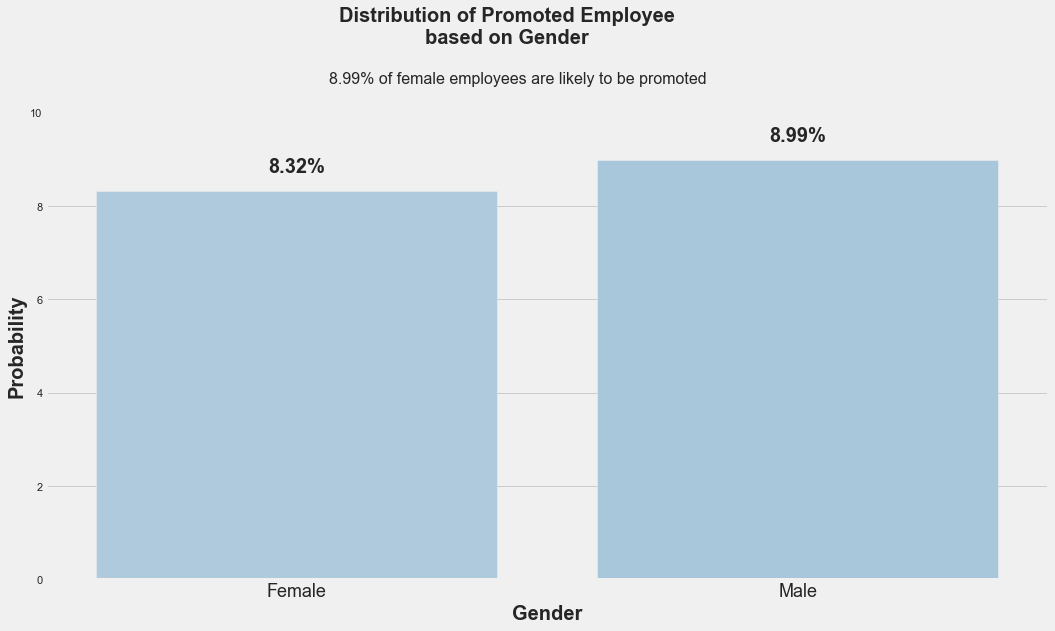

In [39]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(x='gender', 
                y='promotion_probs', 
                data=gender_probs,ax=ax1,
                palette=sns.color_palette("Blues_d", n_colors=40, desat=1),
                order=gender_probs.sort_values('promotion_probs',ascending = True).gender)

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=20,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Distribution of Promoted Employee
based on Gender'''
fig.text(x=0.48, y=1, s=title, fontsize=20, weight='bold', ha='center')

#add description
text = '''
8.99% of female employees are likely to be promoted
'''
fig.text(x=0.49, y=0.9, s=text, fontsize=16, ha='center')

#set y axis limit 
plt.ylim(0, 10)

# add label
plt.xlabel('Gender', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(["Female", 'Male'], fontsize = 18)

plt.tight_layout
plt.savefig('fig/Promotion by Gender.png');

##### Probability to Get Promotion based on `recruitment_channel`
<a id = 'promoted_by_recruitment_channel' ></a>

In [40]:
rc_probs = data.groupby(['recruitment_channel', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

rc_probs.columns = ['recruitment_channel', 'is_promoted','employees']

rc_probs = pd.pivot_table(rc_probs,
                             index = 'recruitment_channel',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

rc_probs.columns = ['recruitment_channel','not_promoted','promoted']
rc_probs['promotion_probs'] = (rc_probs['promoted']/(rc_probs['not_promoted']+rc_probs['promoted']))*100
rc_probs = rc_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
rc_probs

recruitment_channel  not_promoted  promoted  promotion_probs
0            referred          1004       138        12.084063
1            sourcing         21246      1974         8.501292
2               other         27890      2556         8.395191

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

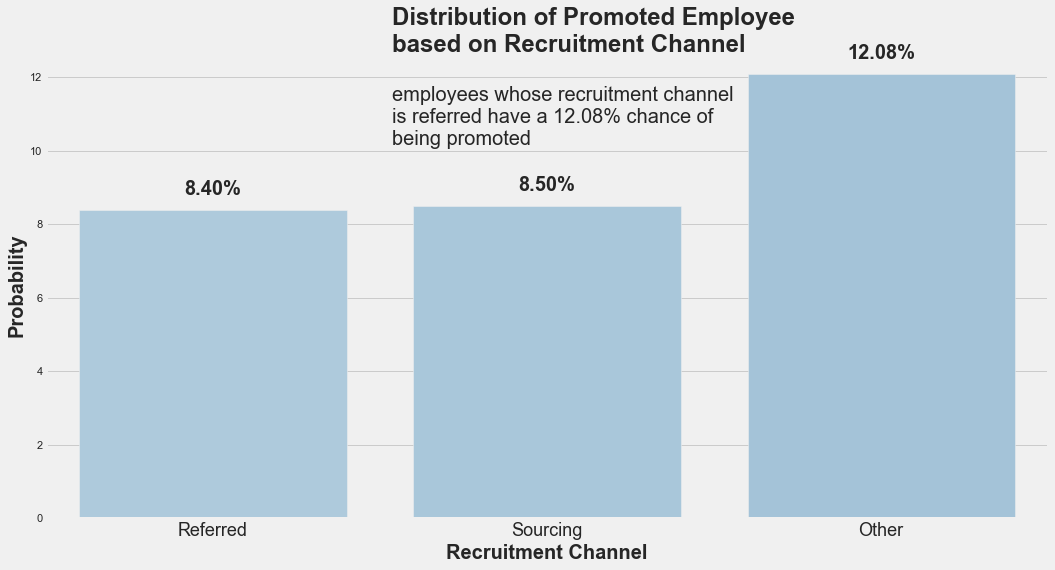

In [41]:
#melihat jumlah karyawan yang dipromosikan berdasarkan Kpi
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(x='recruitment_channel', y='promotion_probs', 
                data=rc_probs,ax=ax1,
                palette=sns.color_palette("Blues_d", n_colors=40, desat=1),
                order=rc_probs.sort_values('promotion_probs',ascending = True).recruitment_channel)

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=20,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Distribution of Promoted Employee
based on Recruitment Channel'''
fig.text(x=0.38, y=0.88, s=title, fontsize=24, weight='bold')

#add description
text = '''
employees whose recruitment channel
is referred have a 12.08% chance of 
being promoted
'''
fig.text(x=0.38, y=0.68, s=text, fontsize=20)

#set y axis limit 
#plt.ylim(0, 25)

# add label
plt.xlabel('Recruitment Channel', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(['Referred', 'Sourcing', 'Other'], fontsize = 18)

plt.tight_layout
#plt.savefig('fig/Recruitment Channel Promoted Probability.png');

##### Probability to Get Promotion based on `department`
<a id = 'promoted_by_department' ></a>

In [42]:
data_department = pd.pivot_table(data,
                    index = ['department'],
                    columns = ['is_promoted'],
                    aggfunc = {'is_promoted' : ['count']}).reset_index()
data_department.columns = ['department', 'not_promoted', 'promoted']
data_department['total'] = data_department['not_promoted']+data_department['promoted']
data_department['probability'] = round((data_department['promoted']/data_department['total'])*100,2)
data_department = data_department.sort_values(['probability'], ascending=False)
data_department

department  not_promoted  promoted  total  probability
8         Technology          6370       768   7138        10.76
5        Procurement          6450       688   7138         9.64
0          Analytics          4840       512   5352         9.57
4         Operations         10325      1023  11348         9.01
1            Finance          2330       206   2536         8.12
7  Sales & Marketing         15627      1213  16840         7.20
6                R&D           930        69    999         6.91
2                 HR          2282       136   2418         5.62
3              Legal           986        53   1039         5.10

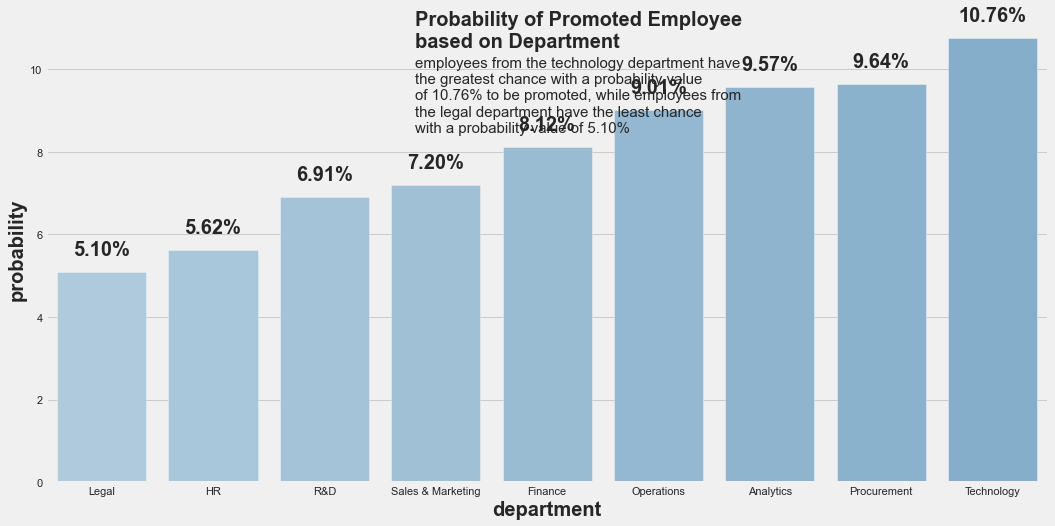

In [43]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(x='department', 
                y='probability', 
                data=data_department,ax=ax1,
                palette=sns.color_palette("Blues_d", n_colors=40, desat=1),
                order=data_department.sort_values('probability',ascending = True).department)

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=20,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Probability of Promoted Employee
based on Department'''
fig.text(x=0.4, y=0.825, s=title, fontsize=20, weight='bold')

#add description
text = '''
employees from the technology department have 
the greatest chance with a probability value 
of 10.76% to be promoted, while employees from
the legal department have the least chance 
with a probability value of 5.10%
'''
fig.text(x=0.4, y=0.65, s=text, fontsize=15)

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('department', fontsize = 20, weight='bold')
plt.ylabel('probability', fontsize = 20, weight='bold')

plt.tight_layout
plt.savefig('fig/Promotion by Department.png');

##### Promotion Probabilities Based on Gender and KPI
<a id = 'promoted_by_gender_n_kpi' ></a>

In [44]:
prob_gk = data.groupby(['gender','KPIs_met >80%','is_promoted'])['employee_id'].count().reset_index()
gk = prob_gk.pivot_table(index=['gender','KPIs_met >80%'], columns='is_promoted', 
                       values='employee_id').reset_index()
gk.columns = ['gender', 'kpi', 'not_promoted','promoted']
gk['total'] = gk['not_promoted']+gk['promoted']
gk['probability'] = round((gk['promoted']/gk['total'])*100,2)
gk['kpi'] = np.where(gk['kpi']==0, '<80%', '>80%')
gk

gender   kpi  not_promoted  promoted  total  probability
0      f  <80%          9692       431  10123         4.26
1      f  >80%          5153      1036   6189        16.74
2      m  <80%         24419       975  25394         3.84
3      m  >80%         10876      2226  13102        16.99

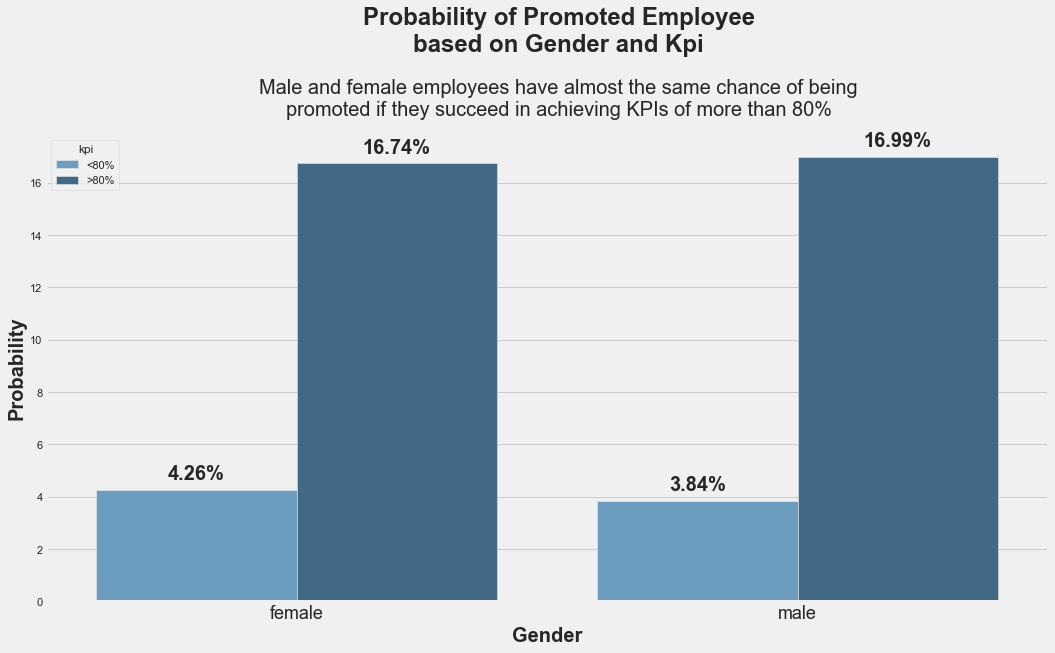

In [45]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(x='gender', y='probability', hue='kpi',
                data=gk,ax=ax1,
                palette=sns.color_palette("Blues_d", n_colors=2, desat=1))

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=20,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Probability of Promoted Employee
based on Gender and Kpi'''
fig.text(x=0.525, y=1.025, s=title, fontsize=24, weight='bold',ha='center')

#add description
text = '''
Male and female employees have almost the same chance of being
promoted if they succeed in achieving KPIs of more than 80%
'''
fig.text(x=0.525, y=0.875, s=text, fontsize=20,ha='center')

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Gender', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(['female', 'male'], fontsize = 18)

plt.tight_layout
plt.savefig('fig/Gender-KPI probability.png');

##### Promotion Probabilities Based on Average Training Score and KPI
<a id = 'promoted_by_score_n_kpi' ></a>

In [46]:
data['hs'] = np.where(data['avg_training_score']>=90, 1, 0)
prob_tk = data.groupby(['hs','KPIs_met >80%','is_promoted'])['employee_id'].count().reset_index()
tk = prob_tk.pivot_table(index=['hs','KPIs_met >80%'], columns='is_promoted', 
                       values='employee_id').reset_index()
tk.columns = ['high_score', 'kpi', 'not_promoted','promoted']
tk['total'] = tk['not_promoted']+tk['promoted']
tk['probability'] = round((tk['promoted']/tk['total'])*100,2)
tk['kpi'] = np.where(tk['kpi']==0, '<80%', '>80%')
tk

high_score   kpi  not_promoted  promoted  total  probability
0           0  <80%         33994      1202  35196         3.42
1           0  >80%         15969      2879  18848        15.27
2           1  <80%           117       204    321        63.55
3           1  >80%            60       383    443        86.46

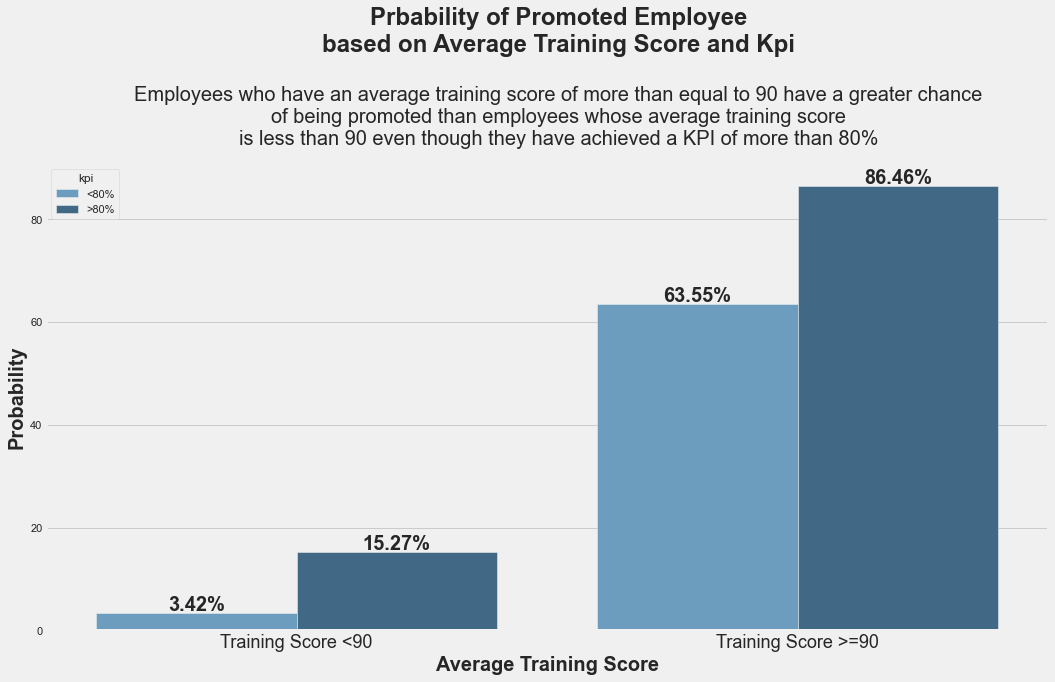

In [47]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(x='high_score', 
                y='probability', 
                hue='kpi',
                data=tk,
                ax=ax1,
                palette=sns.color_palette("Blues_d", n_colors=2, desat=1))

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=20,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Prbability of Promoted Employee
based on Average Training Score and Kpi'''
fig.text(x=0.525, y=1.075, s=title, fontsize=24, weight='bold',ha='center')

#add description
text = '''
Employees who have an average training score of more than equal to 90 have a greater chance
of being promoted than employees whose average training score
is less than 90 even though they have achieved a KPI of more than 80%
'''
fig.text(x=0.525, y=0.875, s=text, fontsize=20,ha='center')

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Average Training Score', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(['Training Score <90', 'Training Score >=90'], fontsize = 18)

plt.tight_layout
plt.savefig('fig/Training-KPI Probability.png');

##### Promotion Probabilities Based on Department and Gender
<a id = 'promoted_by_dept_n_gender' ></a>

In [48]:
prob_dg = data.groupby(['department','gender','is_promoted'])['employee_id'].count().reset_index()
dg = prob_dg.pivot_table(index=['department','gender'], columns='is_promoted', 
                       values='employee_id').reset_index()
dg.columns = ['department', 'gender', 'not_promoted','promoted']
dg['total'] = dg['not_promoted']+dg['promoted']
dg['probability'] = round((dg['promoted']/dg['total'])*100,2)
dg['gender'] = np.where(dg['gender']=='m', 'male', 'female')
dg = dg.sort_values(['probability'], ascending=False)
dg

department  gender  not_promoted  promoted  total  probability
0           Analytics  female           451        62    513        12.09
10        Procurement  female          2902       385   3287        11.71
17         Technology    male          3859       491   4350        11.29
12                R&D  female            51         6     57        10.53
16         Technology  female          2511       277   2788         9.94
8          Operations  female          4235       442   4677         9.45
1           Analytics    male          4389       450   4839         9.30
9          Operations    male          6090       581   6671         8.71
3             Finance    male          1704       151   1855         8.14
2             Finance  female           626        55    681         8.08
11        Procurement    male          3548       303   3851         7.87
15  Sales & Marketing    male         12649      1037  13686         7.58
13                R&D    male           879        63    942         6.69
4                  HR  female           948        58   1006         5.77
14  Sales & Marketing  female          2978       176   3154         5.58
5                  HR    male          1334        78   1412         5.52
7               Legal    male           843        47    890         5.28
6               Legal  female           143         6    149         4.03

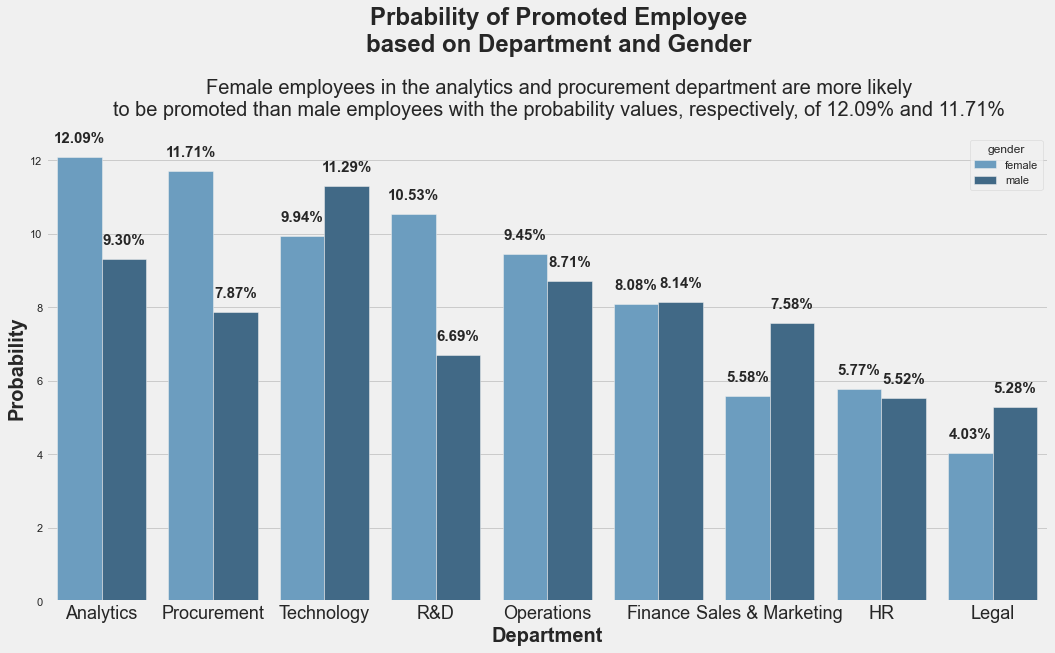

In [49]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(x='department', 
                y='probability', 
                hue='gender',
                data=dg,
                ax=ax1,
                palette=sns.color_palette("Blues_d", n_colors=2, desat=1)
                #order=dg.sort_values('probability',ascending = True).department
               )

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=15,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Prbability of Promoted Employee
based on Department and Gender'''
fig.text(x=0.525, y=1.025, s=title, fontsize=24, weight='bold',ha='center')

#add description
text = '''
Female employees in the analytics and procurement department are more likely
to be promoted than male employees with the probability values, respectively, of 12.09% and 11.71%
'''
fig.text(x=0.525, y=0.875, s=text, fontsize=20,ha='center')

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Department', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(['Analytics','Procurement','Technology',
                   'R&D','Operations','Finance','Sales & Marketing','HR','Legal'], fontsize = 18)

plt.tight_layout
plt.savefig('fig/department-gender Probability.png');

##### Promotion Probabilities Based on Department and KPI
<a id = 'promoted_by_dept_n_kpi' ></a>

In [50]:
prob_dk = data.groupby(['department','KPIs_met >80%','is_promoted'])['employee_id'].count().reset_index()
dk = prob_dk.pivot_table(index=['department','KPIs_met >80%'], columns='is_promoted', 
                       values='employee_id').reset_index()
dk.columns = ['department', 'kpi', 'not_promoted','promoted']
dk['total'] = dk['not_promoted']+dk['promoted']
dk['probability'] = round((dk['promoted']/dk['total'])*100,2)
dk['kpi'] = np.where(dk['kpi']==0, '<80%', '>80%')
dk = dk.sort_values(['probability'], ascending=False)
dk

department   kpi  not_promoted  promoted  total  probability
17         Technology  >80%          1923       535   2458        21.77
15  Sales & Marketing  >80%          3604       860   4464        19.27
11        Procurement  >80%          2195       500   2695        18.55
1           Analytics  >80%          1808       355   2163        16.41
9          Operations  >80%          4190       698   4888        14.28
3             Finance  >80%           922       130   1052        12.36
13                R&D  >80%           366        50    416        12.02
5                  HR  >80%           713        95    808        11.76
7               Legal  >80%           308        39    347        11.24
2             Finance  <80%          1408        76   1484         5.12
8          Operations  <80%          6135       325   6460         5.03
16         Technology  <80%          4447       233   4680         4.98
0           Analytics  <80%          3032       157   3189         4.92
10        Procurement  <80%          4255       188   4443         4.23
12                R&D  <80%           564        19    583         3.26
14  Sales & Marketing  <80%         12023       353  12376         2.85
4                  HR  <80%          1569        41   1610         2.55
6               Legal  <80%           678        14    692         2.02

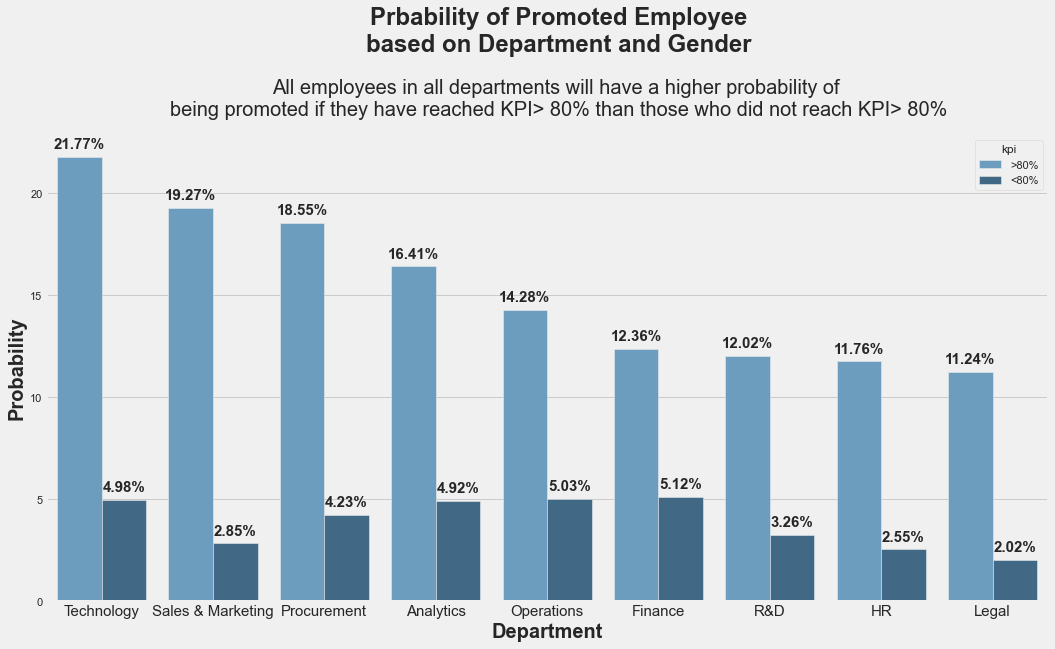

In [51]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(x='department', y='probability', hue='kpi',
                data=dk,ax=ax1,
                palette=sns.color_palette("Blues_d", n_colors=2, desat=1)
               )

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=15,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Prbability of Promoted Employee
based on Department and Gender'''
fig.text(x=0.525, y=1.025, s=title, fontsize=24, weight='bold',ha='center')

#add description
text = '''
All employees in all departments will have a higher probability of 
being promoted if they have reached KPI> 80% than those who did not reach KPI> 80%
'''
fig.text(x=0.525, y=0.875, s=text, fontsize=20,ha='center')

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Department', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(['Technology','Sales & Marketing','Procurement',
                   'Analytics','Operations','Finance','R&D','HR','Legal'], fontsize = 15)

plt.tight_layout
plt.savefig('fig/department-gender Probability.png');

##### Promotion Probabilities Based on Awards and KPI
<a id = 'promoted_by_awards_n_kpi' ></a>

In [52]:
prob_ak = data.groupby(['awards_won?','KPIs_met >80%','is_promoted'])['employee_id'].count().reset_index()
ak = prob_ak.pivot_table(index=['awards_won?','KPIs_met >80%'], columns='is_promoted', 
                       values='employee_id').reset_index()
ak.columns = ['won_awards', 'kpi', 'not_promoted','promoted']
ak['total'] = ak['not_promoted']+ak['promoted']
ak['probability'] = round((ak['promoted']/ak['total'])*100,2)
ak['won_awards'] = np.where(ak['won_awards']==0, 'No', 'Yes')
ak['kpi'] = np.where(ak['kpi']==0, '<80%', '>80%')
ak = ak.sort_values(['probability'], ascending=False)
ak

won_awards   kpi  not_promoted  promoted  total  probability
2        Yes  <80%           202       239    441        54.20
3        Yes  >80%           509       320    829        38.60
1         No  >80%         15520      2942  18462        15.94
0         No  <80%         33909      1167  35076         3.33

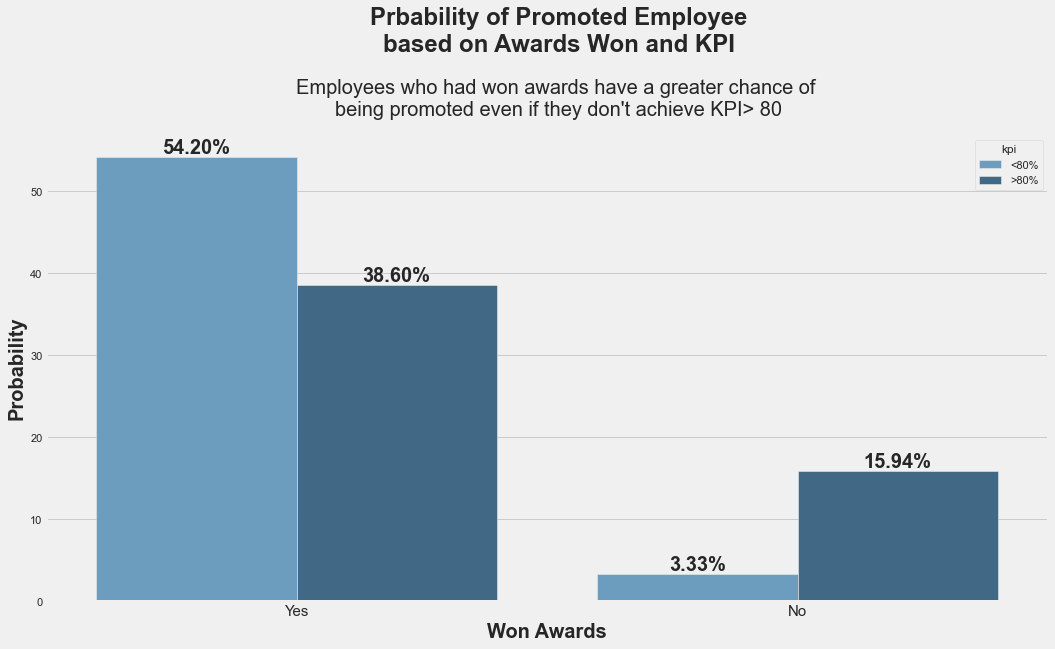

In [53]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(x='won_awards', y='probability', hue='kpi',
                data=ak,ax=ax1,
                palette=sns.color_palette("Blues_d", n_colors=2, desat=1))

#add percentage labels
for p in g.patches:
    height = p.get_height()
    g.text(x = p.get_x() + (p.get_width()/2),
                y = height + 0.4,
                s = str('{:.2f}'.format(height)) + '%',
                ha = 'center',
                fontsize=20,
                weight='bold')
    
plt.xticks(rotation=0)

#add title
title = '''Prbability of Promoted Employee
based on Awards Won and KPI'''
fig.text(x=0.525, y=1.025, s=title, fontsize=24, weight='bold',ha='center')

#add description
text = '''
Employees who had won awards have a greater chance of 
being promoted even if they don't achieve KPI> 80
'''
fig.text(x=0.525, y=0.875, s=text, fontsize=20,ha='center')

#set y axis limit 
#plt.ylim(0, 20)

# add label
plt.xlabel('Won Awards', fontsize = 20, weight='bold')
plt.ylabel('Probability', fontsize = 20, weight='bold')
g.set_xticklabels(['Yes','No'], fontsize = 15)

plt.tight_layout
plt.savefig('fig/awards-kpi Probability.png');

## Early Insight from Original Data
__*This early insights are obtained from original data (no action on pre-processing yet). These insights will be used as the ideas for data pre-processing*__

1. Our data is imbalanced class. Hypotheticaly, it can be poor for our model.<br>*Klicik [promoted/not_promoted](#promoted/not_promoted) for more details.*


2. There are 2 features with missing value, 1 for numerical & 1 for non-numerical (categorical data). `previous_year_rating` as numerical data has 7.52% (4124 rows) missing value. `education` as non-numerical data has 4.40% (2409 rows) missing value. Compared to the dataset, this missing value is not too big<br>*Klick [distribution_of_missing_value](#distribution_of_missing_value) for more details*


3. The distribution of promoted/not promoted employees is not equal. Promoted employees are lower than not promoted. **But employees who can met their KPIs > 80% have higher probability to be promoted** than employees who can't met their KPIs > 80%<br>*Klick [promoted_by_kpi](#promoted_by_kpi) for more details*<br>


4. Employees with a rating> = 3 get more promotion. However, there are also employees with a rating <3 who are still promoted, **but the probability is low.**<br>*Klik [previous_year_rating](#previous_year_rating) untuk melihat visualisasinya*<br>


5. Employees who wn any award in the previous year have high probability to be promoted.<br>*Klick [awards_won?](#awards_won?) for more details*<br>


6. Most of employees still take only 1 training. So this condition make their proability is higher than others. Moreover, employees with >=5 number of training almost nothing to be prmoted.<br>*Klick [no_of_trainings](#no_of_trainings) for more details*<br>


7. The average training score has its own pattern. Employee with highest score (>=90) almost 100% get promoted. However this pattern can't stand aone to predict eligibility of employees for promotion.<br>*Klik [avg_training_score](#avg_training_score) untuk melihat visualisasinya*<br>


8. Most of employees come from Bachelor's background. The different between 3 types of education not too big.<br>*Klick [promoted_by_education](#promoted_by_education) for more details*<br>


9. Region not give big effect for promotion process of employees. However, we can see that there are some region that have higher probability than others. Next we can use it for more data preparation.<br>*Klik [promoted_by_region](#promoted_by_region) untuk melihat visualisasinya*<br> 

# Data Pre-Processing

## Fix Duplicate Value

In [54]:
data_clean = data.copy()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
 14  promoted              54808 non-null  object 
 15  hs                 

In [55]:
data_clean.duplicated().sum()

0

_**There are no duplicate values**_

## Fix The Missing Value

**Remove `employee_id` since every rows have each unique values***</br>

From this step, the dataset is changed into new object called `data_clean`
* `data_clean` was created to save the clean data (fix missing value and duplicated data)
* The *feature engineering* results will be saved into `data_clean`

In [56]:
data_clean['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

__*Fix the missing value in `education` feature with `mode()` function to fill them with the most frequently occuring values*__

In [57]:
data_clean['education'] = data_clean['education'].fillna(data_clean['education'].mode()[0])

In [58]:
data_clean['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

__*Fix the missing value in `previous_year_rating` feature with `median()` function to fill them with the median values. The reason is the distribution of this feature looks normal (the `mean` value and `median` value is close enough)*__

In [59]:
data_clean['previous_year_rating'].fillna(data_clean['previous_year_rating'].median(), inplace=True)

In [60]:
data_clean.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
promoted                0
hs                      0
dtype: int64

## Feature Engineering

Based on the dataset, we decided to create 4 new features using the data from existing features

1. `potential_region`: contains the information of whether an employee was placed in potential region to be promoted or not
2. `performance_level`: contains the information that show the performance level of an employee. This feature comes from combination of `previous_year_rating`, `KPIs_met >80%`, and `awards_won?`
3. `High_Avg_Tscore`: contains the information of whether the average training score of an employee is high enough for promotion chance based on the previous data
4. `male`: contains the information to show an employee gender

### `potential_region`

*Contains the information of whether an employee was placed in potential region to be promoted or not*</br>
**1. based on the probability information on [promoted_by_region](#promoted_by_region), there are 8 regions that have a higher potential than other regions, namely with a probability value> 10%**</br>
**2. The regions are 4, 17, 25, 28, 23, 22, 3, 7 (in the order starting from the one with the highest probability value)**</br>
**3. if the employee is in the region, it will have a value of '1' otherwise it will be worth '0'**


In [61]:
data_cat = data_clean.select_dtypes(include=['object'])
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'unik nilai']
data_cat_unique = data_cat_unique.sort_values('unik nilai', ascending=False)
data_cat_unique

fitur  unik nilai
1               region          34
0           department           9
2            education           3
4  recruitment_channel           3
3               gender           2
5             promoted           2

In [62]:
data_clean['potential_region'] = np.where(
    data_clean['region'].isin(['region_4','region_17','region_25',
                               'region_28','region_23','region_3','region_7'])
    ,1, 0)
data_clean.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted promoted  hs  potential_region  
0            0       No   0                 1  
1            0       No   0                 0  
2            0       No   0                 0  
3            0       No   0                 1  
4            0       No   0                 0

In [63]:
data_cat = data_clean.select_dtypes(include=['object'])
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'unik nilai']
data_cat_unique = data_cat_unique.sort_values('unik nilai', ascending=False)
data_cat_unique

fitur  unik nilai
1               region          34
0           department           9
2            education           3
4  recruitment_channel           3
3               gender           2
5             promoted           2

In [64]:

potential_reg_probs = data_clean.groupby(['potential_region', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

potential_reg_probs.columns = ['potential_region', 'is_promoted','employees']

potential_reg_probs = pd.pivot_table(potential_reg_probs,
                             index = 'potential_region',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

potential_reg_probs.columns = ['potential_region','not_promoted','promoted']
potential_reg_probs['total_employees'] = potential_reg_probs['not_promoted'] + potential_reg_probs['promoted']
potential_reg_probs['promotion_probs'] = (potential_reg_probs['promoted']/(potential_reg_probs['not_promoted']+potential_reg_probs['promoted']))*100
potential_reg_probs = potential_reg_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
potential_reg_probs['potential_region'] = np.where(potential_reg_probs['potential_region'] == 1, 'YES', 'NO')
potential_reg_probs

potential_region  not_promoted  promoted  total_employees  promotion_probs
0              YES          9698      1302            11000        11.836364
1               NO         40442      3366            43808         7.683528

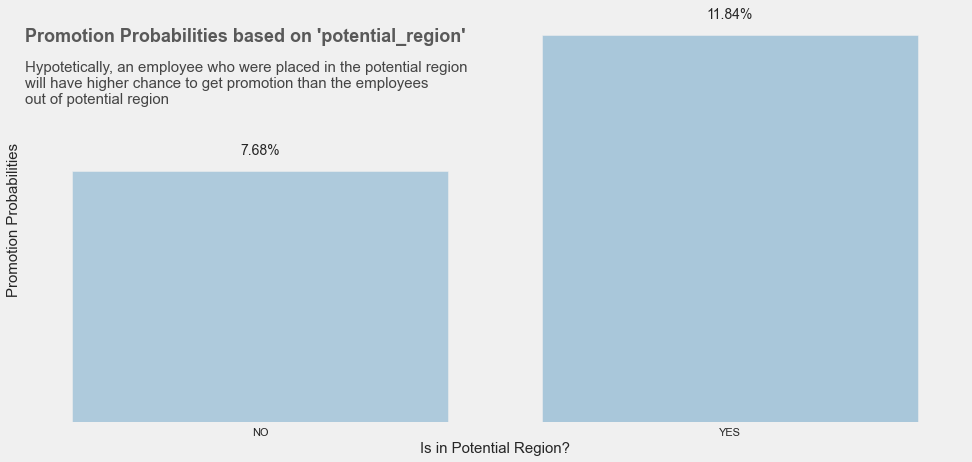

In [65]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x='potential_region', y='promotion_probs', data=potential_reg_probs,
                order=potential_reg_probs.sort_values('promotion_probs')['potential_region'],
                palette=sns.color_palette("Blues_d", n_colors=40, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center'
          )

title = '''
Promotion Probabilities based on 'potential_region'
'''

text = '''
Hypotetically, an employee who were placed in the potential region
will have higher chance to get promotion than the employees 
out of potential region
'''

plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Is in Potential Region?', fontsize = 15) # Add the x-label
plt.ylabel('Promotion Probabilities', fontsize = 15) # Add the y-label

plt.text(x = -0.5, y = 11, s=title,
        fontsize = 18, weight = 'bold', alpha = .75)
plt.text(x = -0.5, y = 9.25, s=text,
        fontsize = 15, alpha = .85);

plt.savefig('fig/Probability based on potential_region.png')

### `performance_level`

This feature comes from combination of `previous_year_rating`, `KPIs_met >80%`, and `awards_won?`

Based on the probability obtained in [promoted_by_kpi](#promoted_by_kpi), [previous_year_rating](#previous_year_rating), and [awards_won?](#awards_won?) have been shown that the probability will be higher if an employee met this 3 conditions

1. An employee who met their KPI > 80 % has higher chance to get promotion than others who didn't met their KPI
2. An employee who got 5 rating in the previous year has 9% higher chance to get promoted than others
3. An employee who won any award in the previous year has 36% higher chance to get promotion thanothers

This feature will have performance level as its value, from 1 `(low)` to 4 `(best)`, with the provisions below:
- if KPIs_met = 1 & rating = 5 & awards_won = 1, then `4 (Best)`
- if KPIs_met = 1 & rating = 4/5 & awards_won = 1/0, then `3 (Better)`
- if KPIs_met = 1 & rating = 3 & awards_won = 1/0, then `2 (Good)`
- else `1 (Low)`


<a id = 'performance_level' ></a>

In [66]:
data_clean['performance_level'] = np.where(
    (
        (data_clean['previous_year_rating'] == 5) &
        (data_clean['KPIs_met >80%'] == 1) &
        (data_clean['awards_won?'] == 1)
    ),
"Best",
    np.where((
        ((data_clean['previous_year_rating'] == 4) & (data_clean['KPIs_met >80%'] == 0) & (data_clean['awards_won?'] == 1)) | 
        ((data_clean['previous_year_rating'] == 4) & (data_clean['KPIs_met >80%'] == 1) & (data_clean['awards_won?'] == 0)) |
        ((data_clean['previous_year_rating'] == 4) & (data_clean['KPIs_met >80%'] == 1) & (data_clean['awards_won?'] == 1)) |
        ((data_clean['previous_year_rating'] == 5) & (data_clean['KPIs_met >80%'] == 0) & (data_clean['awards_won?'] == 1)) |
        ((data_clean['previous_year_rating'] == 5) & (data_clean['KPIs_met >80%'] == 1) & (data_clean['awards_won?'] == 0))
    ),
    "Better",
    np.where(
        ((data_clean['previous_year_rating'] == 3) & (data_clean['KPIs_met >80%'] == 0) & (data_clean['awards_won?'] == 1)) | 
        ((data_clean['previous_year_rating'] == 3) & (data_clean['KPIs_met >80%'] == 1) & (data_clean['awards_won?'] == 0)) |
        ((data_clean['previous_year_rating'] == 3) & (data_clean['KPIs_met >80%'] == 1) & (data_clean['awards_won?'] == 1)),
        "Good","Low"
    )
    )
)

In [67]:

perform_probs = data_clean.groupby(['performance_level', 'is_promoted']).agg({
    'department': ['count']
}).reset_index()

perform_probs.columns = ['performance_level', 'is_promoted','employees']

perform_probs = pd.pivot_table(perform_probs,
                             index = 'performance_level',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()

perform_probs.columns = ['performance_level','not_promoted','promoted']
perform_probs['total_employees'] = perform_probs['not_promoted'] + perform_probs['promoted']
perform_probs['promotion_probs'] = (perform_probs['promoted']/(perform_probs['not_promoted']+perform_probs['promoted']))*100
perform_probs = perform_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
perform_probs

performance_level  not_promoted  promoted  total_employees  promotion_probs
0              Best           114       125              239        52.301255
1              Good          5203      1232             6435        19.145299
2            Better          9460      1953            11413        17.112065
3               Low         35363      1358            36721         3.698156

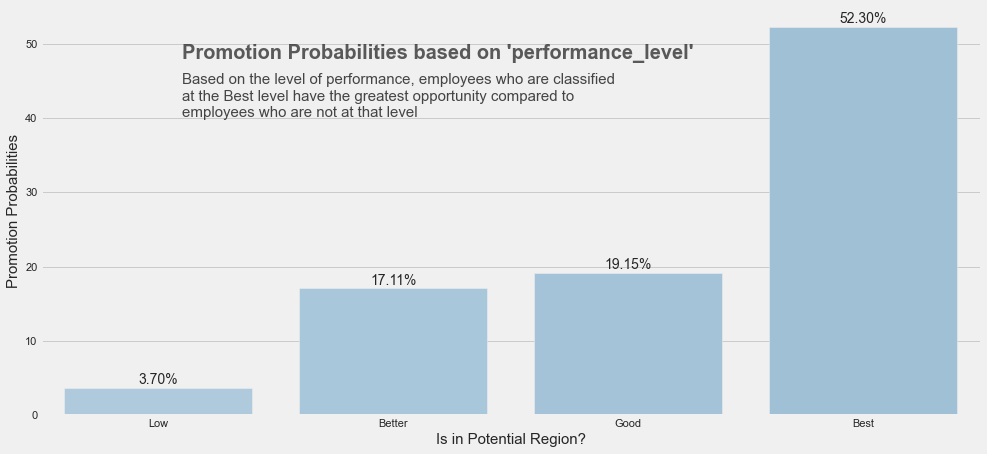

In [71]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x='performance_level', y='promotion_probs', data=perform_probs,
                order=perform_probs.sort_values('promotion_probs',ascending = True).performance_level,
                palette=sns.color_palette("Blues_d", n_colors=40, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center'
          )

title = '''
Promotion Probabilities based on 'performance_level'
'''

text = '''
Based on the level of performance, employees who are classified
at the Best level have the greatest opportunity compared to 
employees who are not at that level
'''

#plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Is in Potential Region?', fontsize = 15) # Add the x-label
plt.ylabel('Promotion Probabilities', fontsize = 15) # Add the y-label

plt.text(x = 0.1, y = 45, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 0.1, y = 38, s=text,
        fontsize = 15, alpha = .85);

plt.savefig('fig/Probability based on performance_level.png')

### `High_Avg_Tscore`

This feature will have information on whether an employee has an average training score of more than or equal to 90 which has a greater chance of getting a promotion
1. based on the probability information on [avg_training_score](#avg_training_score), the opportunity for employees with a value greater than 90 is 76.83%
2. If the employee has this value then the value is '1' otherwise it will be worth '0'

In [72]:
data_clean['High_Avg_Tscore'] = np.where(data_clean['avg_training_score']>=90, 1, 0)
data_clean.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted promoted  hs  potential_region performance_level  \
0            0       No   0                 1            Better   
1            0       No   0                 0               Low   
2            0       No   0                 0               Low   
3            0       No   0                 1               Low   
4            0       No   0                 0               Low   

   High_Avg_Tscore  
0                0  
1                0  
2                0  
3                0  
4                0

### `male`

*Contains the information to show an employee gender from `gender` feature*
1. If the `gender` value is `m`, `male` feature will have value `1`, if not the value will be set to `0`
2. This is to reduce the feature encoding results that may be affect the number of feature


In [73]:
data_clean['male'] = np.where(data_clean['gender']=='m', 1, 0)
data_clean.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted promoted  hs  potential_region performance_level  \
0            0       No   0                 1            Better   
1            0       No   0                 0               Low   
2            0       No   0                 0               Low   
3            0       No   0                 1               Low   
4            0       No   0                 0               Low   

   High_Avg_Tscore  male  
0                0     0  
1                0     1  
2                0     1  
3                0     1  
4                0     1

## Feature encoding
*To convert the categorical data into numerical format. The goal is to get the optimum learning process of our model. The technique we choose is `one-hot-encoding`. The reason is the cardinality of the categorical data is not too large*

### `department`

In [74]:
dummies_dept = pd.get_dummies(data_clean['department'], prefix='Dept')
data_clean = pd.concat([data_clean, dummies_dept], axis=1)

### `education`

In [75]:
dummies_edu = pd.get_dummies(data_clean['education'])
data_clean = pd.concat([data_clean, dummies_edu], axis=1)

### `recruitment_channel`

In [76]:
dummies_rc = pd.get_dummies(data_clean['recruitment_channel'])
data_clean = pd.concat([data_clean, dummies_rc], axis=1)

### `performance_level`

In [77]:
dummies_pl = pd.get_dummies(data_clean['performance_level'])
data_clean = pd.concat([data_clean, dummies_pl], axis=1)

In [78]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             54808 non-null  int64  
 1   department              54808 non-null  object 
 2   region                  54808 non-null  object 
 3   education               54808 non-null  object 
 4   gender                  54808 non-null  object 
 5   recruitment_channel     54808 non-null  object 
 6   no_of_trainings         54808 non-null  int64  
 7   age                     54808 non-null  int64  
 8   previous_year_rating    54808 non-null  float64
 9   length_of_service       54808 non-null  int64  
 10  KPIs_met >80%           54808 non-null  int64  
 11  awards_won?             54808 non-null  int64  
 12  avg_training_score      54808 non-null  int64  
 13  is_promoted             54808 non-null  int64  
 14  promoted                54808 non-null

## Log Transformation

__*From this step, we use `df_pre` as the dataset. At the beginning, this dataset was copied from `data_clean`. So this `df_pre` will be used to save the log transformation result, norm/std results*__


In [79]:
features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?',
            'avg_training_score','is_promoted','potential_region','Dept_Analytics','Dept_Finance','Dept_HR','Dept_Legal',
            'Dept_Operations','Dept_Procurement','Dept_R&D','Dept_Sales & Marketing','Dept_Technology',"Bachelor's",
            'Below Secondary',"Master's & above", 'other','referred','sourcing','male','High_Avg_Tscore','Best','Better','Good','Low']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

In [80]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   employee_id                 54808 non-null  int64  
 1   department                  54808 non-null  object 
 2   region                      54808 non-null  object 
 3   education                   54808 non-null  object 
 4   gender                      54808 non-null  object 
 5   recruitment_channel         54808 non-null  object 
 6   no_of_trainings             54808 non-null  int64  
 7   age                         54808 non-null  int64  
 8   previous_year_rating        54808 non-null  float64
 9   length_of_service           54808 non-null  int64  
 10  KPIs_met >80%               54808 non-null  int64  
 11  awards_won?                 54808 non-null  int64  
 12  avg_training_score          54808 non-null  int64  
 13  is_promoted                 548

In [81]:
df_pre.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          54808.000000   
mean   39195.830627         1.253011     34.803915              3.304481   
std    22586.581449         0.609264      7.660169              1.214770   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted            hs  ...  log_Master's & above     log_other  \
count  54808.000000  54808.000000  ...          54808.000000  54808.000000   
mean       0.085170      0.013940  ...              0.188721      0.384766   
std        0.279137      0.117241  ...              0.308838      0.344727   
min        0.000000      0.000000  ...              0.000000      0.000000   
25%        0.000000      0.000000  ...              0.000000      0.000000   
50%        0.000000      0.000000  ...              0.000000      0.693359   
75%        0.000000      0.000000  ...              0.693359      0.693359   
max        1.000000      1.000000  ...              0.693359      0.693359   

       log_referred  log_sourcing      log_male  log_High_Avg_Tscore  \
count  54808.000000  54808.000000  54808.000000         54808.000000   
mean       0.014450      0.293945      0.486852             0.009662   
std        0.098999      0.342529      0.316918             0.081265   
min        0.000000      0.000000      0.000000             0.000000   
25%        0.000000      0.000000      0.000000             0.000000   
50%        0.000000      0.000000      0.693147             0.000000   
75%        0.000000      0.693359      0.693147             0.000000   
max        0.693359      0.693359      0.693147             0.693147   

           log_Best    log_Better      log_Good       log_Low  
count  54808.000000  54808.000000  54808.000000  54808.000000  
mean       0.003025      0.144409      0.081360      0.464355  
std        0.045715      0.281494      0.223145      0.325928  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.693359  
75%        0.000000      0.000000      0.000000      0.693359  
max        0.693359      0.693359      0.693359      0.693359  

[8 rows x 62 columns]

## Normalization

In [84]:
for var in features:
    df_pre['nor_'+var] = MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre),1))

In [85]:
df_pre

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9        Bachelor's      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  ...  nor_Master's & above  nor_other  nor_referred  \
0                      8  ...                   1.0        0.0           0.0   
1                      4  ...                   0.0        1.0           0.0   
2                      7  ...                   0.0        0.0           0.0   
3                     10  ...                   0.0        1.0           0.0   
4                      2  ...                   0.0        1.0           0.0   
...                  ...  ...                   ...        ...           ...   
54803                 17  ...                   0.0        0.0           0.0   
54804                  6  ...                   1.0        1.0           0.0   
54805                  3  ...                   0.0        1.0           0.0   
54806                  2  ...                   0.0        0.0           0.0   
54807                  5  ...                   0.0        1.0           0.0   

       nor_sourcing nor_male  nor_High_Avg_Tscore  nor_Best nor_Better  \
0               1.0      0.0                  0.0       0.0        1.0   
1               0.0      1.0                  0.0       0.0        0.0   
2               1.0      1.0                  0.0       0.0        0.0   
3               0.0      1.0                  0.0       0.0        0.0   
4               0.0      1.0                  0.0       0.0        0.0   
...             ...      ...                  ...       ...        ...   
54803           1.0      1.0                  0.0       0.0        0.0   
54804           0.0      0.0                  0.0       0.0        0.0   
54805           0.0      1.0                  0.0       0.0        1.0   
54806           1.0      1.0                  0.0       0.0        0.0   
54807           0.0      1.0                  0.0       0.0        0.0   

       nor_Good  nor_Low  
0           0.0      0.0  
1           0.0      1.0  
2           0.0      1.0  
3           0.0      1.0  
4           0.0      1.0  
...         ...      ...  
54803       0.0      1.0  
54804       0.0      1.0  
54805       0.0      0.0  
54806       0.0      1.0  
54807       0.0      1.0  

[54808 rows x 99 columns]